In [23]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import imblearn
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
player_df = pd.read_csv('Master/data/Scoring_Agg.csv')
# player_df.head()

In [3]:
player_df.columns

Index(['playerID', 'firstName', 'lastName', 'HOF', 'year_first', 'year_last',
       'seasons', 'GP', 'G', 'A', 'Pts', 'PIM', '+/-', 'PPG', 'PPA', 'SHG',
       'SHA', 'GWG', 'GTG', 'SOG', 'PostGP', 'PostG', 'PostA', 'PostPts',
       'PostPIM', 'Post+/-', 'PostPPG', 'PostPPA', 'PostSHG', 'PostSHA',
       'PostGWG', 'PostSOG'],
      dtype='object')

In [26]:
df = player_df.drop(['playerID','firstName', 'lastName', 'HOF', 'year_first', 'year_last','PostGP', 'PostG', 'PostA', 'PostPts',
       'PostPIM', 'Post+/-', 'PostPPG', 'PostPPA', 'PostSHG', 'PostSHA',
       'PostGWG', 'PostSOG'], axis=1)
data = player_df.drop(['playerID','firstName', 'lastName', 'HOF', 'year_first', 'year_last','PostGP', 'PostG', 'PostA', 'PostPts',
       'PostPIM', 'Post+/-', 'PostPPG', 'PostPPA', 'PostSHG', 'PostSHA',
       'PostGWG', 'PostSOG'], axis=1)
data.shape
data.dtypes

seasons    int64
GP         int64
G          int64
A          int64
Pts        int64
PIM        int64
+/-        int64
PPG        int64
PPA        int64
SHG        int64
SHA        int64
GWG        int64
GTG        int64
SOG        int64
dtype: object

In [5]:
target = player_df['HOF']
# player_df.dtypes

In [6]:
feature_names = data.columns
# feature_names

In [7]:
# dataset = tf.data.Dataset.from_tensor_slices((df.values, target.values))
# dict_slices = tf.data.Dataset.from_tensor_slices((df.to_dict('list'), target.values)).batch(16)

In [8]:
# inputs = {key: tf.keras.layers.Input(shape=(), name=key) for key in df.keys()}
# x = tf.stack(list(inputs.values()), axis=-1)

# x = tf.keras.layers.Dense(10, activation='relu')(x)
# output = tf.keras.layers.Dense(1)(x)

# model_func = tf.keras.Model(inputs=inputs, outputs=output)

# model_func.compile(optimizer='adam',
#                    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#                    metrics=['accuracy'])

In [9]:
# model_func.fit(dict_slices, epochs=100)

In [10]:
# model_func.summary()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
# clf = BalancedRandomForestClassifier(random_state=0)
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test_scaled, y_test)

0.978984238178634

In [18]:
clf.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=209652396)

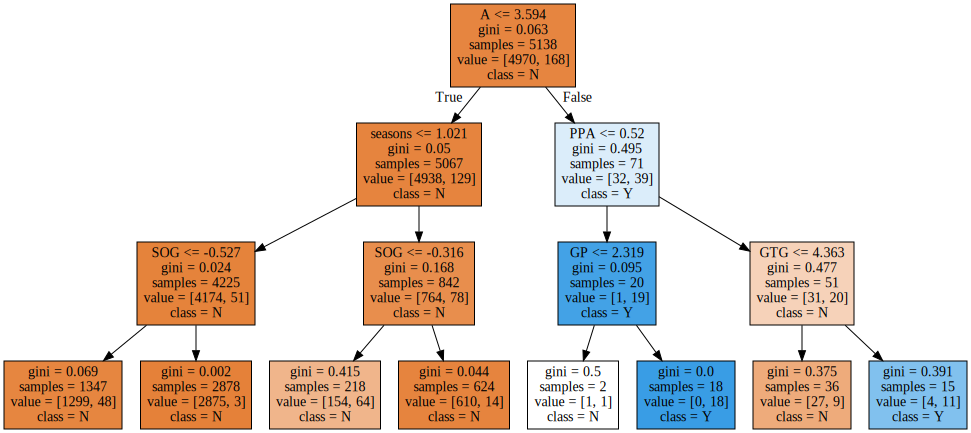

In [31]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf, 
                                feature_names = feature_names, 
                                class_names=['N', 'Y'] , #y_train.columns,
                                filled = True,
#,
#                                 proportion = True,
#                                 leaves_parallel=True
                               )
graph = graphviz.Source(dot_data)
graph

[[1459  208]
 [   3   43]]


C:\Users\Y243863\Anaconda3\envs\bcs\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ValueError: Found array with 0 sample(s) (shape=(0, 26)) while a minimum of 1 is required.

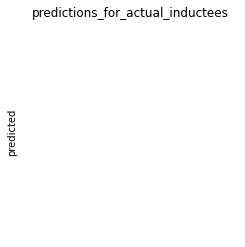

In [15]:
y_predicted = clf.predict(X_test_scaled)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predicted))

predictions_df = pd.concat([pd.DataFrame(X_test_scaled),
#                            .copy().assign(
                           pd.DataFrame(dict(
    predicted= y_predicted,
    actual=y_test
)).reset_index(drop=True)
                           ], axis=1)
# pd.Series(y_test).value_counts()#[:20]
actual_inductees = predictions_df.loc[predictions_df.actual=='Y']
predictions_for_actual_inductees = actual_inductees.predicted.value_counts()
predictions_for_actual_inductees .plot(kind='pie', title='predictions_for_actual_inductees',  labels=predictions_for_actual_inductees.values)

print(f"score for yesses, {clf.score(actual_inductees.drop(['predicted', 'actual'],axis=1),actual_inductees .actual)}")
print('The score is the fraction of yesses, you predicted',  19/(4+19))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted)) #actual_inductees.values.reshape(-1), predictions_for_actual_inductees)
# print(y_predicted.shape)
# print(y_test.shape)

In [16]:
print(clf.feature_importances_)

[0.10517584 0.10893689 0.07334335 0.05542032 0.0525506  0.04497395
 0.05552562 0.0195682  0.01961967 0.01182978 0.00549971 0.01918308
 0.01337501 0.0853469  0.11078919 0.04094406 0.04014085 0.04089781
 0.04413546 0.01280835 0.00928254 0.00296538 0.00185733 0.00145993
 0.00477281 0.01959735]


<BarContainer object of 26 artists>

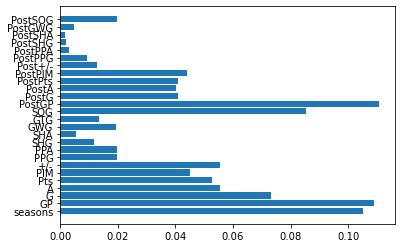

In [17]:
plt.barh(feature_names,clf.feature_importances_)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

In [ ]:
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=2))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [ ]:
deep_model.summary()

In [ ]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

In [ ]:
# Compare the models below

In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")